In [25]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

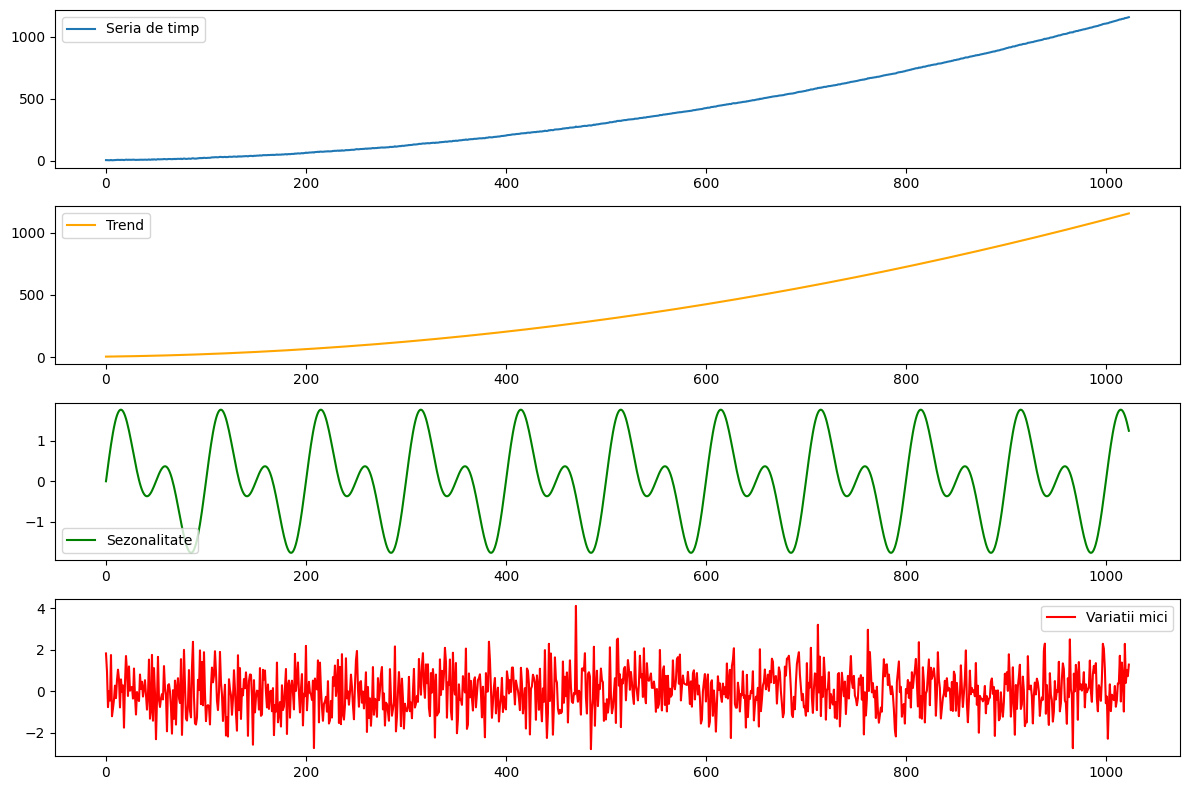

In [14]:
N = 1024
t = np.arange(N)  

a, b, c = 0.001, 0.1, 5
trend = a * t**2 + b * t + c

freq1, freq2 = 1/50, 1/100 
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

variances = np.random.normal(0, 1, N)

time_series = trend + season + variances

fig, axs = plt.subplots(4, 1, figsize=(12, 8))

axs[0].plot(t, time_series, label='Seria de timp')
axs[0].legend()

axs[1].plot(t, trend, label='Trend', color='orange')
axs[1].legend()

axs[2].plot(t, season, label='Sezonalitate', color='green')
axs[2].legend()

axs[3].plot(t, variances, label='Variatii mici', color='red')
axs[3].legend()

plt.tight_layout()
plt.show()

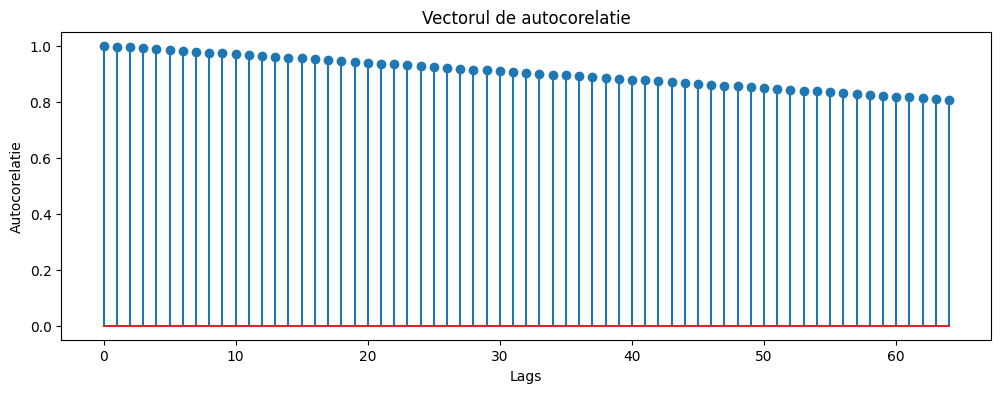

In [49]:
def autocorrelation(series, max_lag):
    n = len(series)
    series = series - np.mean(series) 
    result = np.correlate(series, series, mode='full') / np.var(series)
    max_lag = min(max_lag, n - 1) 
    result = result[n - 1 : n + max_lag]
    return result / n

lags = 64
autocorr = autocorrelation(time_series, lags)

plt.figure(figsize=(12, 4))
plt.stem(range(lags + 1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorelatie')
plt.title('Vectorul de autocorelatie')
plt.show()

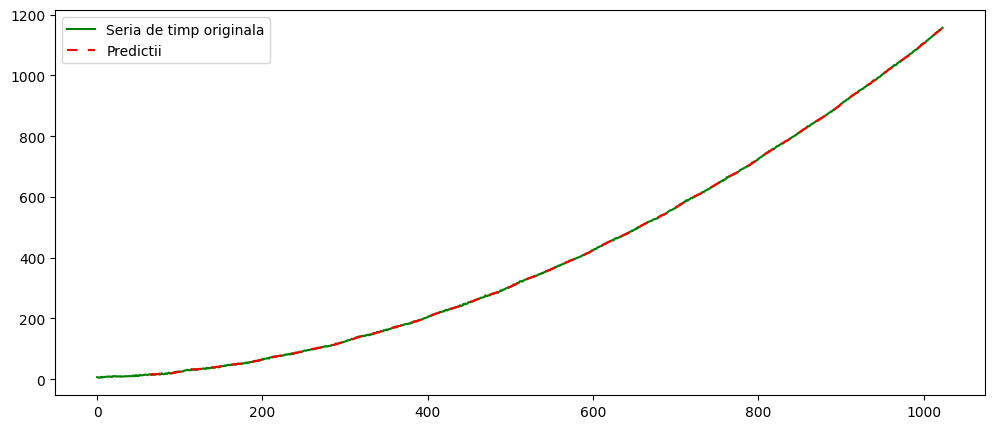

In [48]:
p = 64  

AR = AutoReg(time_series, lags=p).fit()

predictions = AR.predict(start=p, end=N-1, dynamic=False)

plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Seria de timp originala', color='green')
plt.plot(range(p, N), predictions, label='Predictii', color='red', linestyle='--', dashes=(5, 5))
plt.legend()
plt.show()

In [41]:
# Considerand faptul ca vrem sa prezicem mereu doar valoarea seriei de timp pentru un singur pas in viitor, atunci valoarea orizontului m este 1. Astfel, ramane de calculat doar valoarea p, adica numarul de lag-uri. Pentru a afla acest lucru, putem calcula MSE pentru fiecare valoare a lui p si sa alegem valoarea care are MSE-ul cel mai mic.

train_size = int(len(time_series) * 0.9)
train_set, validation_set = time_series[:train_size], time_series[train_size:]

ps = range(1, 128)

mse_dict = {}

for p in ps:
    AR = AutoReg(train_set, lags=p).fit()
    
    predictions = AR.predict(start=len(train_set), end=len(time_series)-1, dynamic=False)
    
    mse = mean_squared_error(validation_set, predictions)
    mse_dict[p] = mse

best_p = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_p]

best_p, best_mse

(98, 1.3403670114628372)